In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [2]:
df1 = pd.read_csv('2019-Dec.csv')
df2 = pd.read_csv('2019-Nov.csv')
df3 = pd.read_csv('2020-Jan.csv')
df4 = pd.read_csv('2020-Feb.csv')
df5 = pd.read_csv('2019-Oct.csv')
dfs = [df1, df2, df3, df4, df5]

combined_df = pd.concat(dfs, ignore_index=True)
combined_df.to_csv('cos.csv', index=False)


In [3]:
df = pd.read_csv('cos.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20692840 entries, 0 to 20692839
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ GB


In [5]:
df.describe()

,product_id,category_id,price,user_id
count,2.069284e+07,2.069284e+07,2.069284e+07,2.069284e+07
mean,5.484297e+06,1.554230e+18,8.534735e+00,5.215527e+08
std,1.305716e+06,1.691038e+17,1.938142e+01,8.744312e+07
min,3.752000e+03,1.487580e+18,-7.937000e+01,4.654960e+05
25%,5.724650e+06,1.487580e+18,2.060000e+00,4.818306e+08
50%,5.810720e+06,1.487580e+18,4.050000e+00,5.531297e+08
75%,5.857864e+06,1.487580e+18,7.060000e+00,5.788573e+08
max,5.932595e+06,2.242903e+18,3.277800e+02,6.220902e+08


In [6]:
df.isna().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    20339246
brand             8757117
price                   0
user_id                 0
user_session         4598
dtype: int64

In [8]:
df.columns
df_copy = df.copy()
df_copy1 = df.copy()

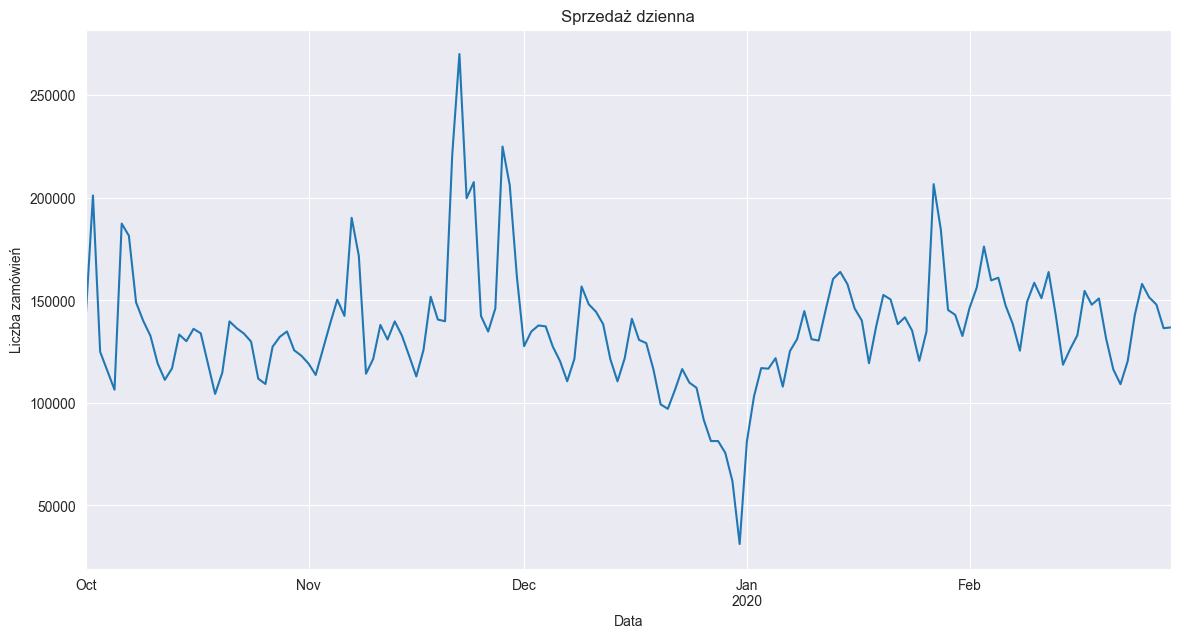

In [10]:
df_copy1['event_time'] = pd.to_datetime(df_copy['event_time'])
df_copy1.set_index('event_time', inplace=True)
df_copy1['count'] = 1

daily_sales = df_copy1.resample('D')['count'].sum()

plt.figure(figsize=(14, 7))
daily_sales.plot(title='Sprzedaż dzienna')
plt.xlabel('Data')
plt.ylabel('Liczba zamówień')
plt.show()


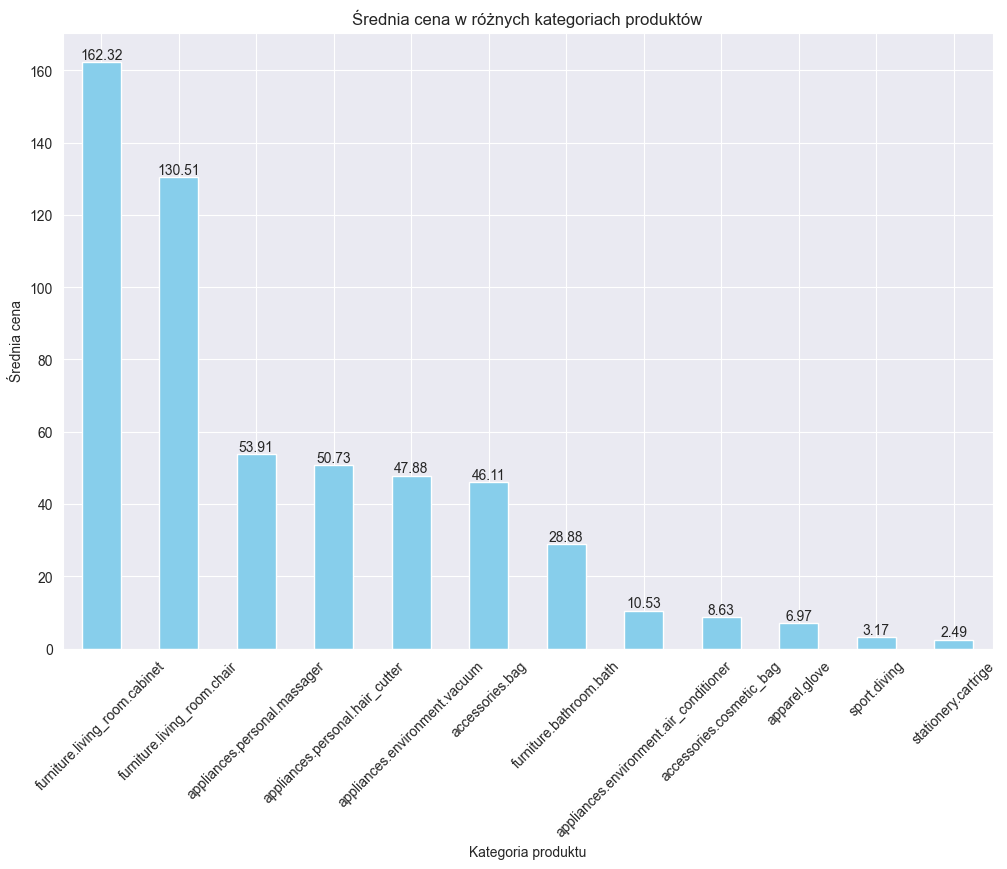

In [51]:
average_price_by_category = df.groupby('category_code')['price'].mean()

plt.figure(figsize=(12, 8))
bars = average_price_by_category.sort_values(ascending=False).plot(kind='bar', color='skyblue')  
plt.title('Średnia cena w różnych kategoriach produktów')
plt.ylabel('Średnia cena')
plt.xlabel('Kategoria produktu')
plt.xticks(rotation=45)  

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', 
             ha='center', va='bottom')

plt.show()

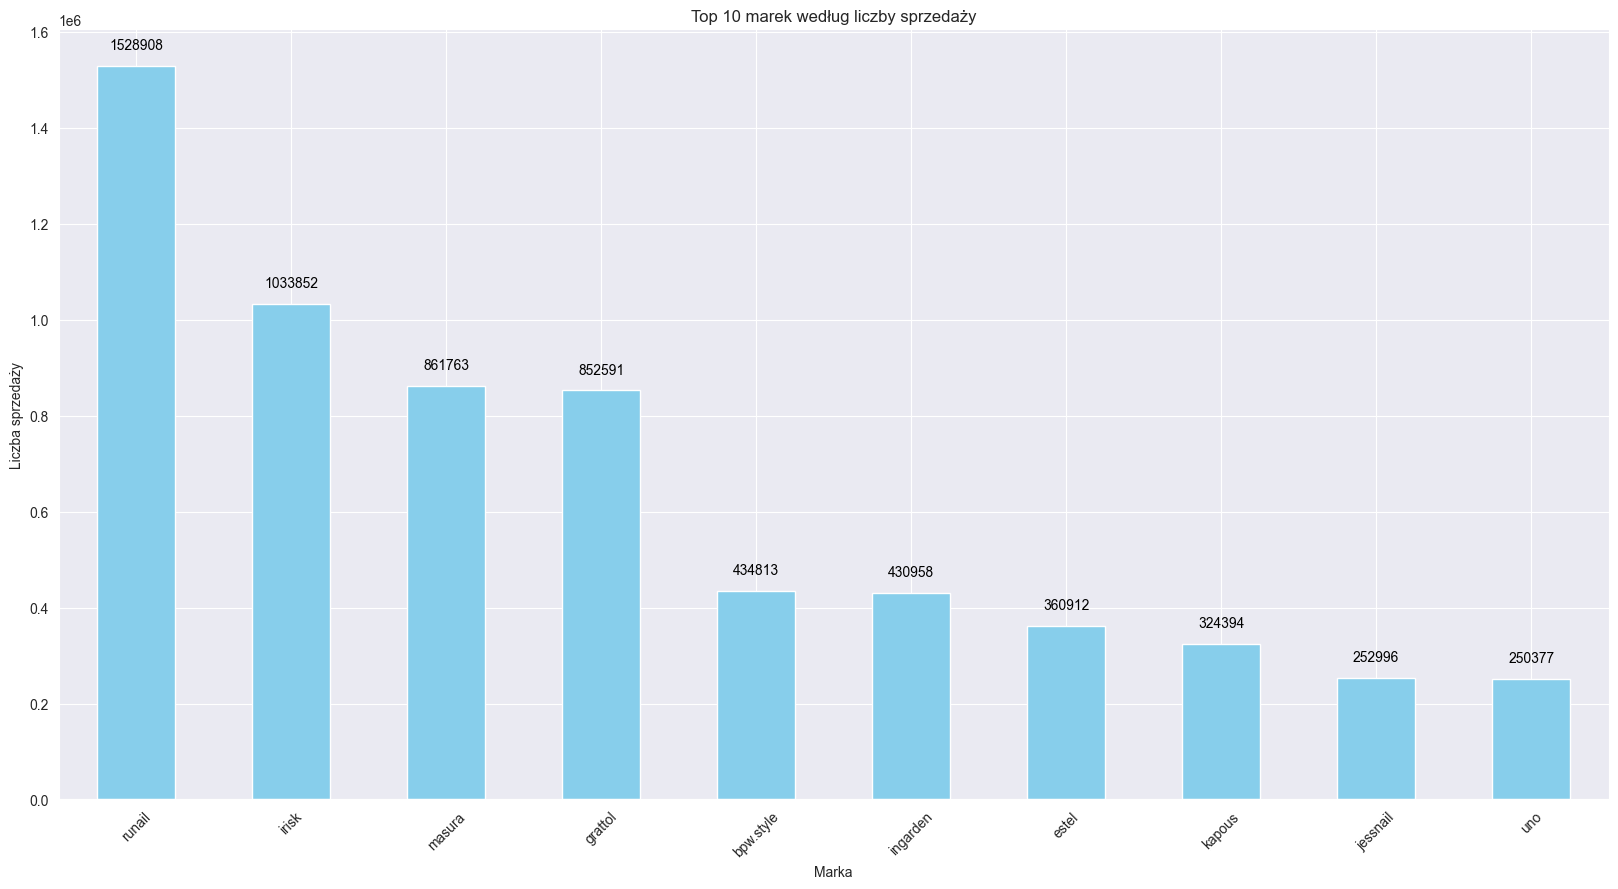

In [49]:
top_brands = df['brand'].value_counts().head(10)

plt.figure(figsize=(20, 10))
bars = top_brands.plot(kind='bar', color='skyblue')
plt.title('Top 10 marek według liczby sprzedaży')
plt.xlabel('Marka')
plt.ylabel('Liczba sprzedaży')
plt.xticks(rotation=45)

for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', color='black', textcoords="offset points", xytext=(0,10))

plt.show()


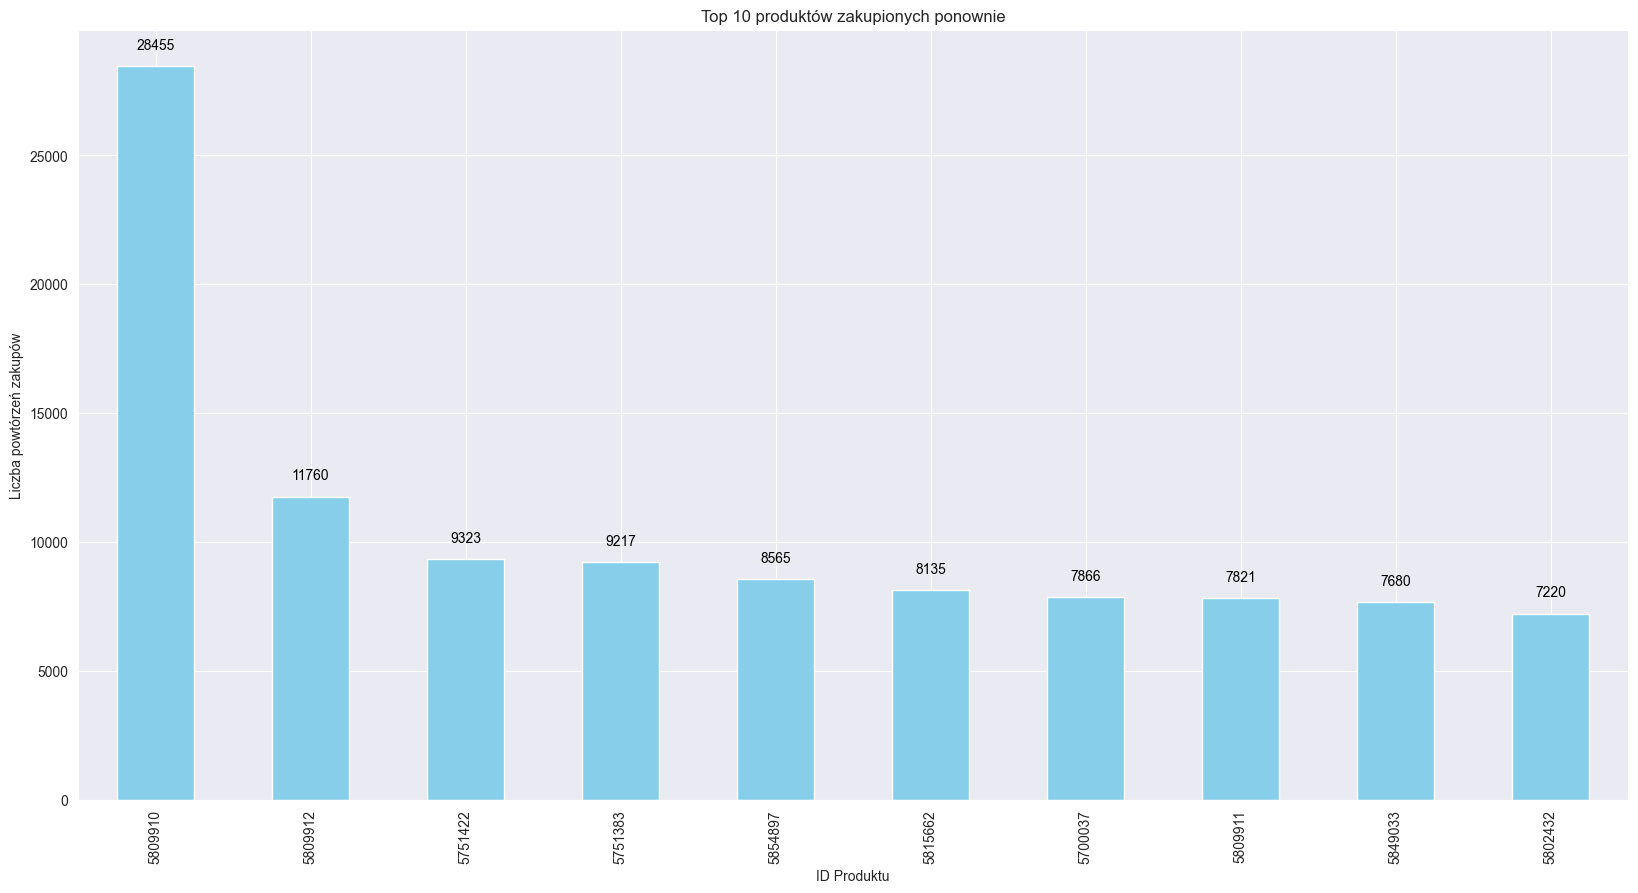

In [53]:
repeat_purchases = df.groupby(['user_id', 'product_id']).size()
repeat_purchases = repeat_purchases[repeat_purchases > 1].reset_index(name='counts')
top_repeats = repeat_purchases['product_id'].value_counts().head(10)

plt.figure(figsize=(20, 10))
bars = top_repeats.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Top 10 produktów zakupionych ponownie')
plt.xlabel('ID Produktu')
plt.ylabel('Liczba powtórzeń zakupów')
for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', color='black', textcoords="offset points", xytext=(0,10))
plt.show()


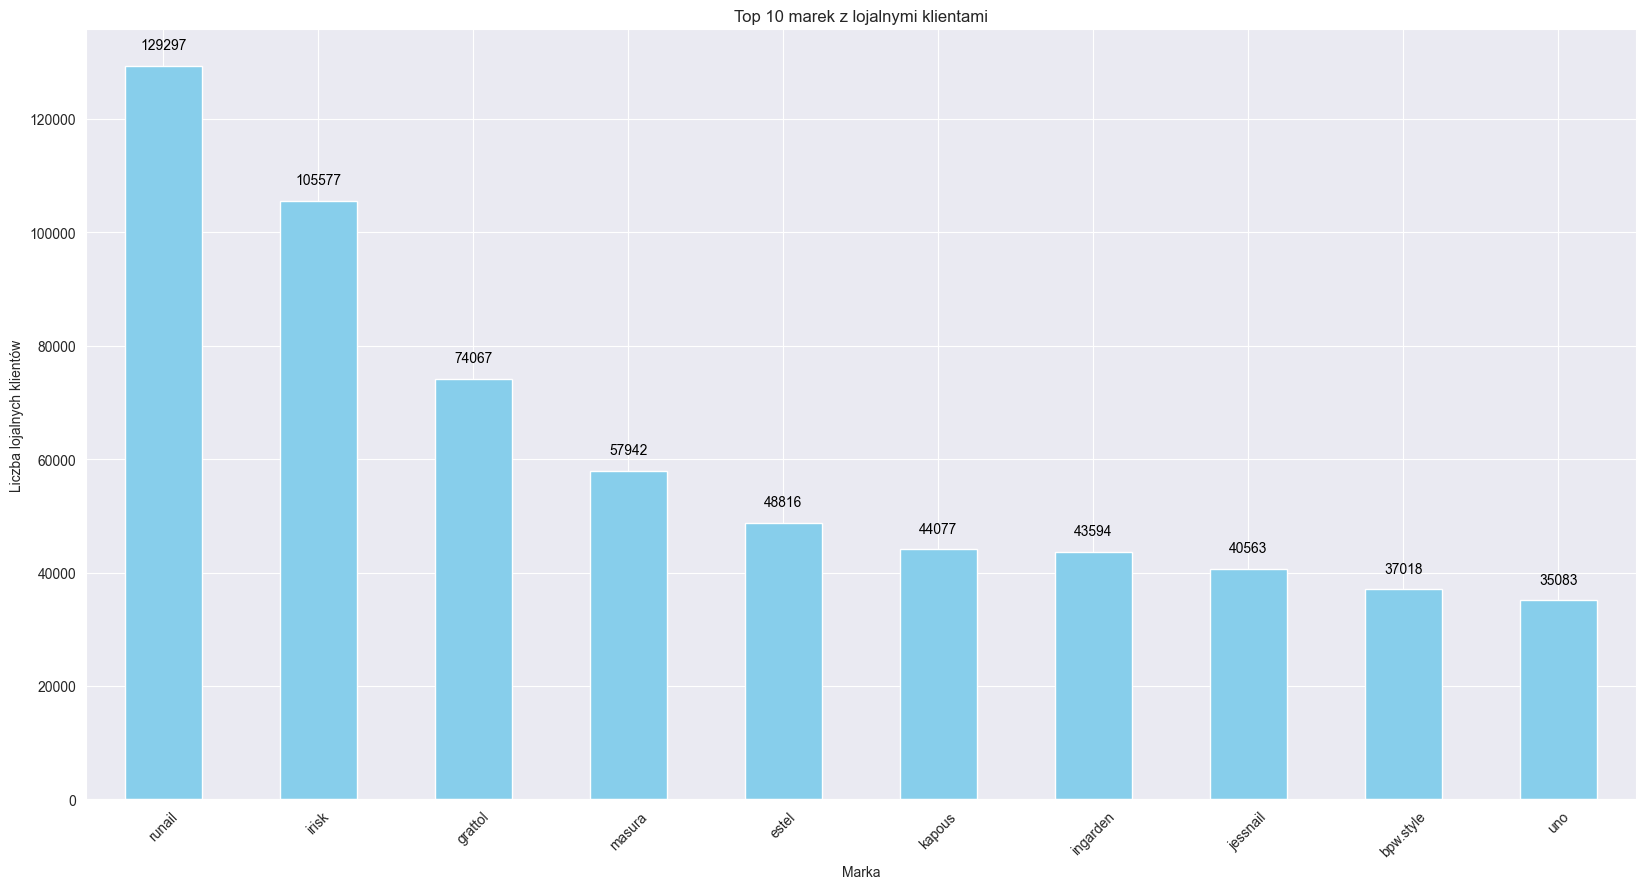

In [54]:
loyalty = df.groupby(['user_id', 'brand']).size().reset_index(name='purchases')
loyalty = loyalty[loyalty['purchases'] > 1]

brand_loyalty = loyalty['brand'].value_counts().head(10)

plt.figure(figsize=(20, 10))
bars = brand_loyalty.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Top 10 marek z lojalnymi klientami')
plt.xlabel('Marka')
plt.ylabel('Liczba lojalnych klientów')
plt.xticks(rotation=45)
for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', color='black', textcoords="offset points", xytext=(0,10))
plt.show()


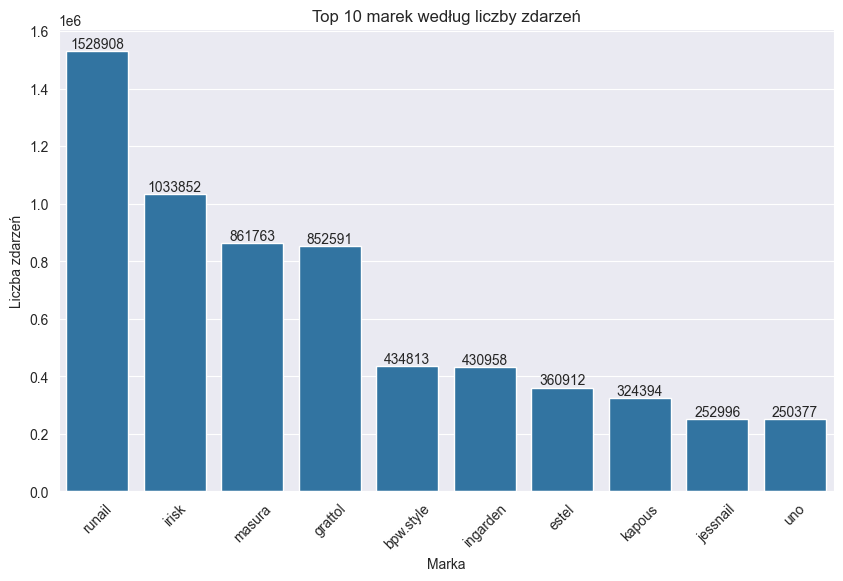

In [68]:
brand_counts = df['brand'].value_counts().head(10)
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.title('Top 10 marek według liczby zdarzeń')
plt.xlabel('Marka')
plt.ylabel('Liczba zdarzeń')
plt.xticks(rotation=45)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
             ha='center', va='bottom')

plt.show()

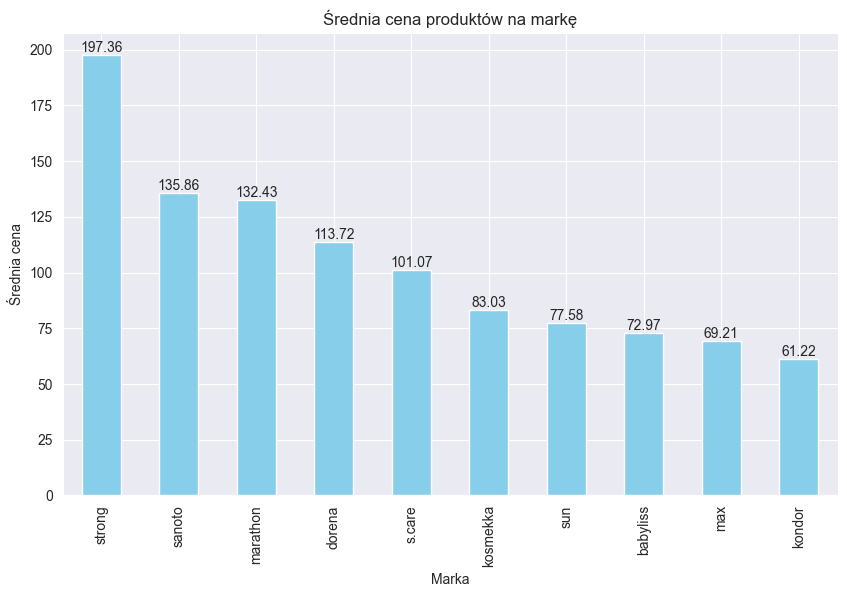

In [69]:
average_price_per_brand = df.groupby('brand')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
bars = average_price_per_brand.plot(kind='bar', color='skyblue')
plt.title('Średnia cena produktów na markę')
plt.xlabel('Marka')
plt.ylabel('Średnia cena')

for rect in bars.patches:
    plt.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), f'{rect.get_height():.2f}',
             ha='center', va='bottom')

plt.show()

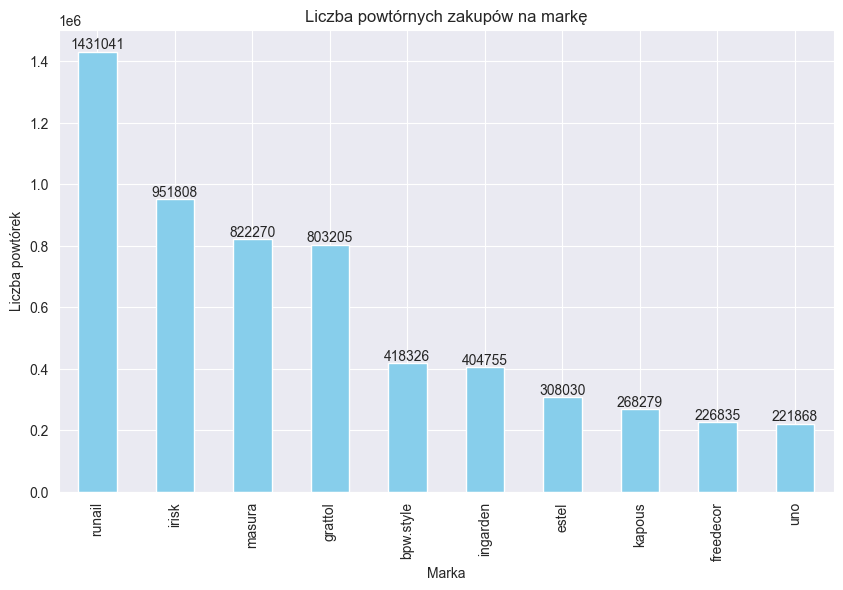

In [73]:
repeat_purchases = df[df.duplicated(['user_id', 'brand'], keep=False)]
repeat_purchase_counts = repeat_purchases['brand'].value_counts().head(10)
plt.figure(figsize=(10, 6))
bars = repeat_purchase_counts.plot(kind='bar', color='skyblue')
plt.title('Liczba powtórnych zakupów na markę')
plt.xlabel('Marka')
plt.ylabel('Liczba powtórek')

for rect in bars.patches:
    plt.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), f'{int(rect.get_height())}',
             ha='center', va='bottom')

plt.show()

<Figure size 1000x600 with 0 Axes>

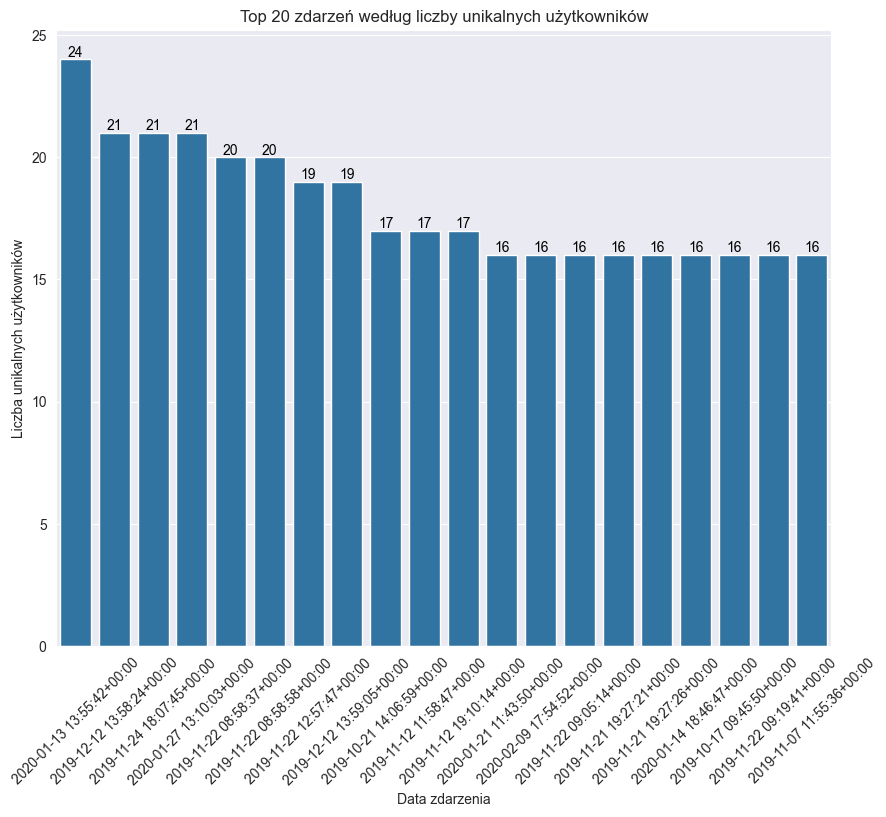

In [58]:
plt.figure(figsize=(10, 6))
brand_user_counts = df_copy.groupby('event_time')['user_id'].nunique().reset_index(name='count_of_user_id')
brand_user_counts = brand_user_counts.sort_values(by='count_of_user_id', ascending=False).head(20)

plt.figure(figsize=(10, 8))
bars = sns.barplot(x='count_of_user_id', y='event_time', data=brand_user_counts, orient='h')
plt.title('Top 20 zdarzeń według liczby unikalnych użytkowników')
plt.xlabel('Liczba unikalnych użytkowników')
plt.ylabel('Data zdarzenia')

for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='left', color='black')

plt.show()

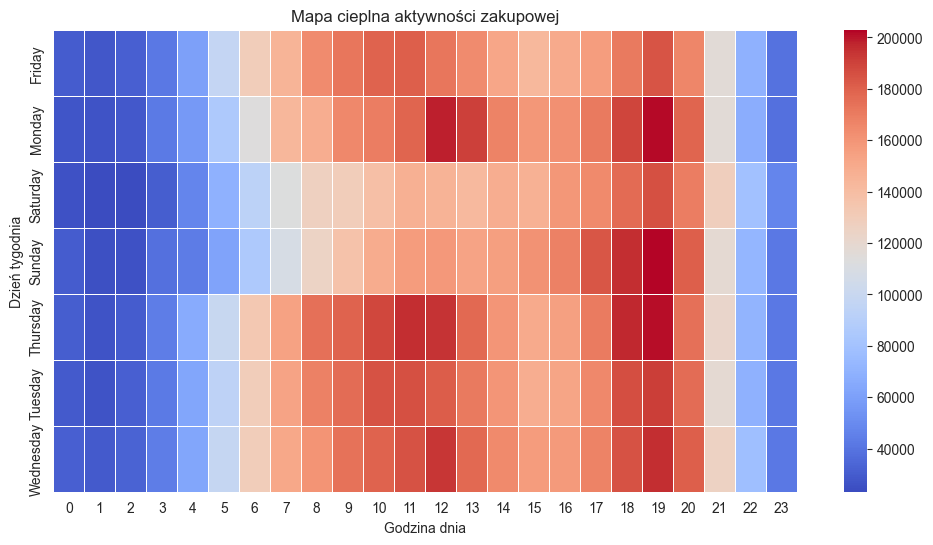

In [17]:
df['event_time'] = pd.to_datetime(df['event_time'])
df['hour'] = df['event_time'].dt.hour
df['day'] = df['event_time'].dt.day_name()

heatmap_data = df.groupby(['day', 'hour']).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, fmt="d", linewidths=.5)
plt.title('Mapa cieplna aktywności zakupowej')
plt.xlabel('Godzina dnia')
plt.ylabel('Dzień tygodnia')
plt.show()


<Figure size 2000x1000 with 0 Axes>

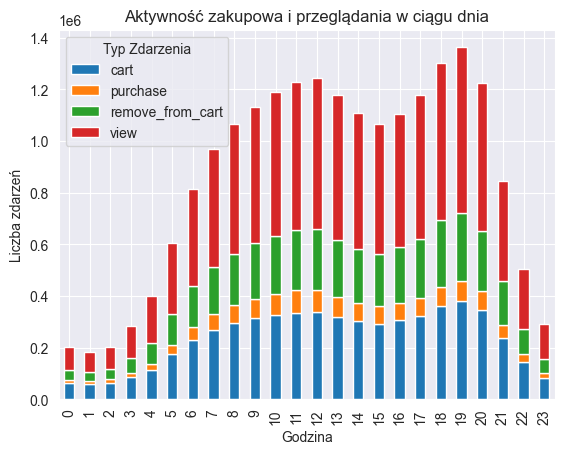

In [66]:
df['hour'] = df['event_time'].dt.hour
hourly_events = df.groupby(['hour', 'event_type']).size().unstack().fillna(0)

plt.figure(figsize=(20, 10))
bars = hourly_events.plot(kind='bar', stacked=True)
plt.title('Aktywność zakupowa i przeglądania w ciągu dnia')
plt.xlabel('Godzina')
plt.ylabel('Liczba zdarzeń')
plt.legend(title='Typ Zdarzenia')

plt.show()


C:\Users\aDELL\AppData\Local\Temp\ipykernel_10136\2862894916.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=event_type_counts.index, y=event_type_counts.values, palette='Set1')


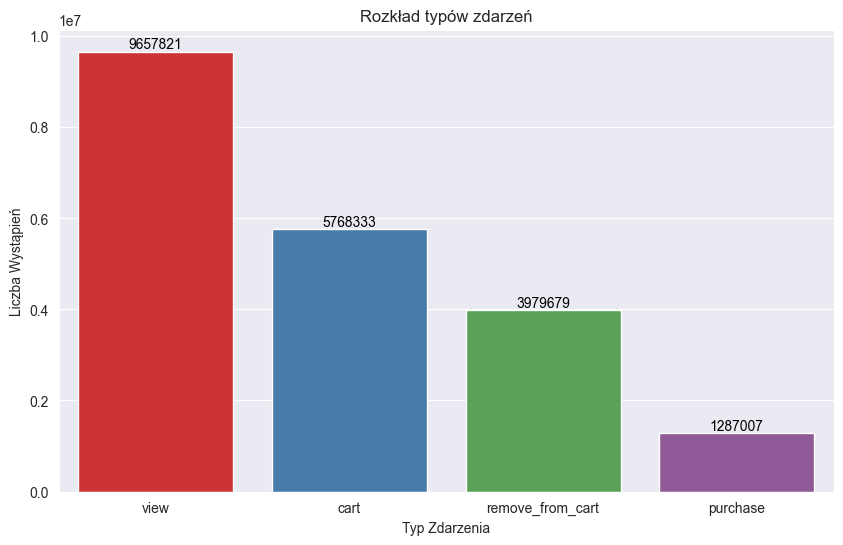

In [28]:
event_type_counts = df['event_type'].value_counts()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=event_type_counts.index, y=event_type_counts.values, palette='Set1')

plt.title('Rozkład typów zdarzeń')
plt.xlabel('Typ Zdarzenia')
plt.ylabel('Liczba Wystąpień')
for index, value in enumerate(event_type_counts.values):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom', color='black')

plt.show()

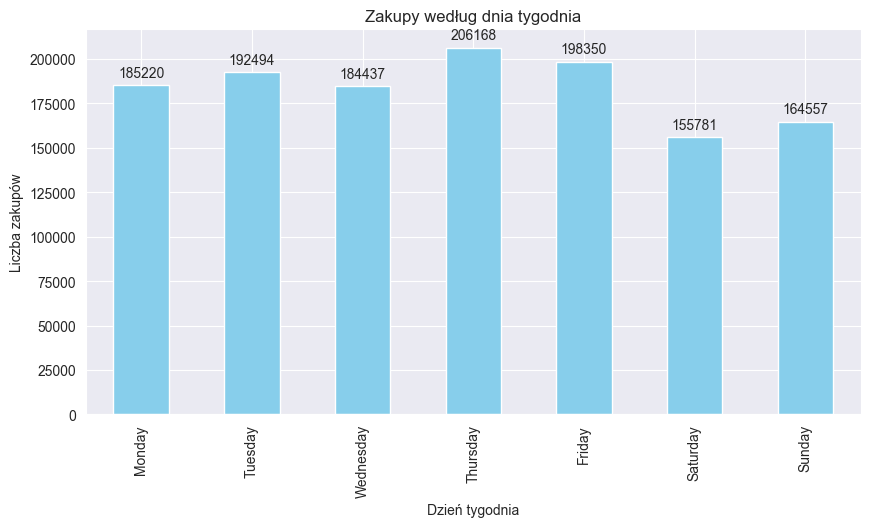

In [33]:
df['event_time'] = pd.to_datetime(df['event_time'])

df['weekday'] = df['event_time'].dt.day_name()

purchase_events = df[df['event_type'] == 'purchase']

weekday_purchases = purchase_events['weekday'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 5))
bars = weekday_purchases.plot(kind='bar', color='skyblue')
plt.title('Zakupy według dnia tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba zakupów')

for p in bars.patches:
    bars.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()


C:\Users\aDELL\AppData\Local\Temp\ipykernel_10136\1751921138.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=event_type_percentage.index, y=event_type_percentage.values, palette='Set1')


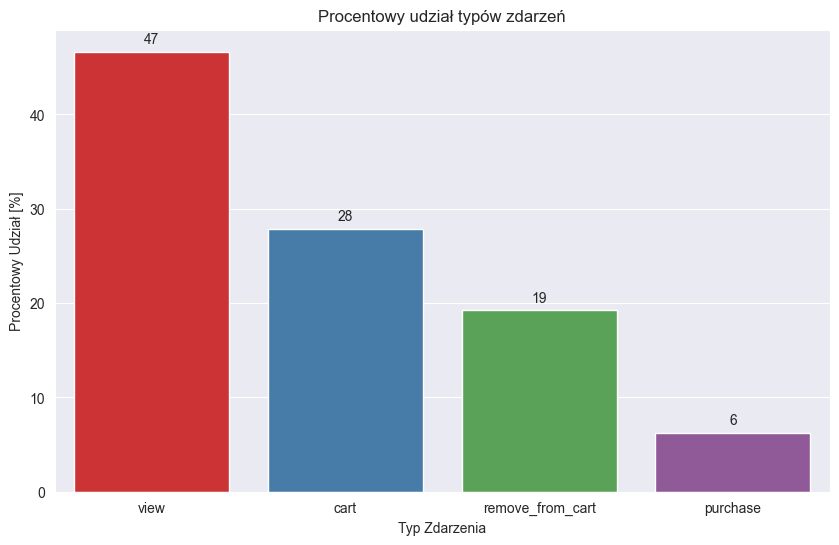

In [42]:
event_type_percentage = df['event_type'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=event_type_percentage.index, y=event_type_percentage.values, palette='Set1')

plt.title('Procentowy udział typów zdarzeń')
plt.xlabel('Typ Zdarzenia')
plt.ylabel('Procentowy Udział [%]')
for p in bars.patches:
    bars.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()